In [ ]:
# A notebook for random visualization of the data

__author__ = "Ba Hung Huynh"

In [1]:
import os
from pprint import pprint
from utils import data_loader
import pandas as pd

In [2]:
path = "dataset"
fs = os.listdir("dataset")
fs

['phase_1_data.tsf',
 'phase2_instance_large_4.txt',
 'phase1_instance_small_4.txt',
 'phase1_instance_small_3.txt',
 'phase2_instance_large_3.txt',
 'phase2_instance_large_2.txt',
 'phase1_instance_small_2.txt',
 'phase1_instance_small_0.txt',
 'phase2_instance_large_0.txt',
 'nov_data.tsf',
 'phase2_instance_large_1.txt',
 'phase1_instance_small_1.txt',
 'phase1_instance_large_1.txt',
 'phase2_instance_small_1.txt',
 'phase2_instance_small_0.txt',
 'phase_2_data.tsf',
 'phase1_instance_large_0.txt',
 'phase1_instance_large_2.txt',
 'phase2_instance_small_2.txt',
 'phase2_instance_small_3.txt',
 'phase1_instance_large_3.txt',
 'phase1_instance_large_4.txt',
 'phase2_instance_small_4.txt',
 'ERA5_Weather_Data_Monash.csv']

In [3]:
data = data_loader.convert_tsf_to_dataframe(os.path.join(path, fs[0]))
data

(   series_name     start_timestamp  \
 0    Building0 2016-07-03 21:30:00   
 1    Building1 2019-01-09 23:15:00   
 2    Building3 2016-03-01 04:15:00   
 3    Building4 2019-07-03 04:45:00   
 4    Building5 2019-07-25 23:00:00   
 5    Building6 2019-07-25 01:45:00   
 6       Solar0 2020-04-25 14:00:00   
 7       Solar1 2018-12-31 13:00:00   
 8       Solar2 2019-06-05 14:00:00   
 9       Solar3 2019-06-05 14:00:00   
 10      Solar4 2019-06-05 14:00:00   
 11      Solar5 2019-01-15 13:00:00   
 
                                          series_value  
 0   [283.8, 283.8, 283.8, 606.0, 606.0, 606.0, 606...  
 1   [8.1, 15.7, 22.8, 32.7, 8.1, 16.5, 24.7, 34.5,...  
 2   [1321.0, 1321.0, 1321.0, 1321.0, 1293.0, 1293....  
 3   [2.0, NaN, 1.0, 2.0, NaN, 2.0, NaN, NaN, 2.0, ...  
 4   [30.0, 31.0, 24.0, 34.0, 30.0, 31.0, 26.0, 33....  
 5   [36.8, 34.6, 34.6, 36.2, 36.2, 35.2, 35.2, 35....  
 6   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
 7   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

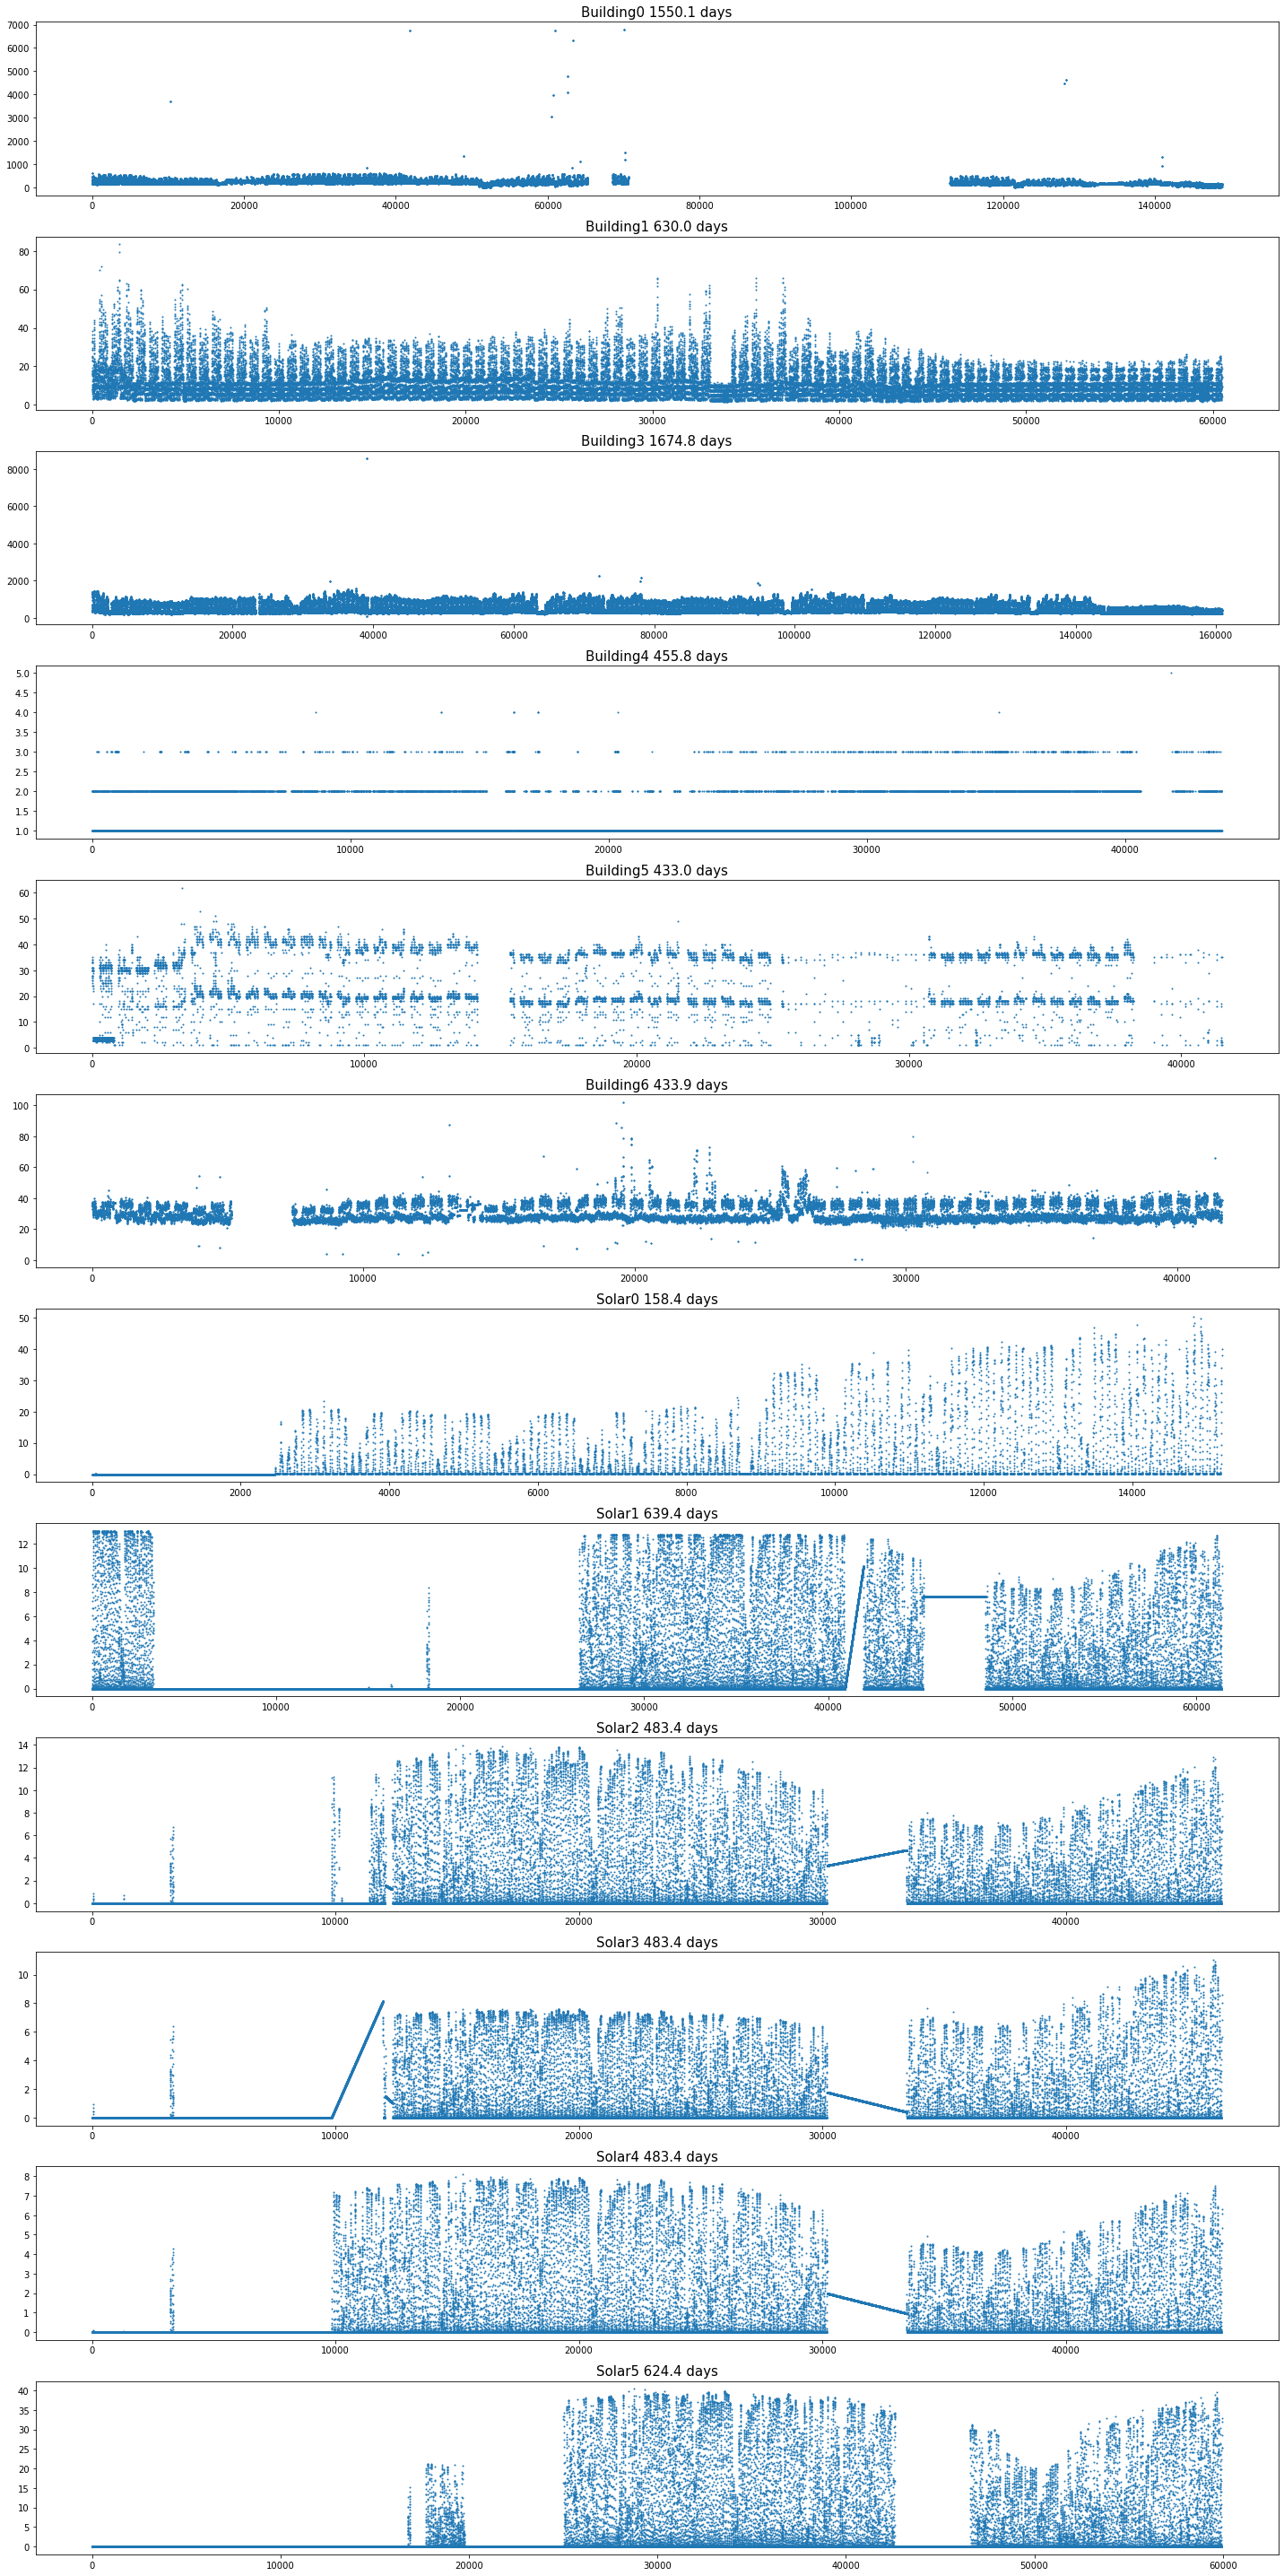

In [30]:
import matplotlib.pyplot as plt

length = len(data[0])

# TODO: This graph is missing time value, which is incremented by every 15 minutes from the start time

# Combine all graphs into the same
# Change the figsize value to fit your scree
fig, axs = plt.subplots(length, figsize=(20, 40))

for i in range(length):
  b = data[0].loc[i].series_value
  name = data[0].loc[i].series_name
  time = ((len(b)-1) * 15/60)/24
  axs[i].set_title("{} {:.1f} days".format(name, time), fontsize=15)
  axs[i].plot(b, 'o', markersize=1)

plt.tight_layout()
plt.show()

In [5]:
weather_file = os.path.join(path, fs[-1])
weather_data = pd.read_csv(weather_file)
weather_data.head()

,datetime (UTC),"coordinates (lat,lon)",model (name),model elevation (surface),utc_offset (hrs),temperature (degC),dewpoint_temperature (degC),wind_speed (m/s),mean_sea_level_pressure (Pa),relative_humidity ((0-1)),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1)
0,2010-01-01 00:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.26,16.39,2.60,101046.38,0.89,287.01,408.35,1.0
1,2010-01-01 01:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.67,16.29,2.91,101037.96,0.86,360.79,411.02,1.0
2,2010-01-01 02:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.16,15.89,3.26,101017.26,0.87,291.54,410.67,1.0
3,2010-01-01 03:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.46,15.33,3.17,101022.56,0.82,357.11,410.95,1.0
4,2010-01-01 04:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.53,15.11,2.95,100940.03,0.80,459.91,410.00,0.9


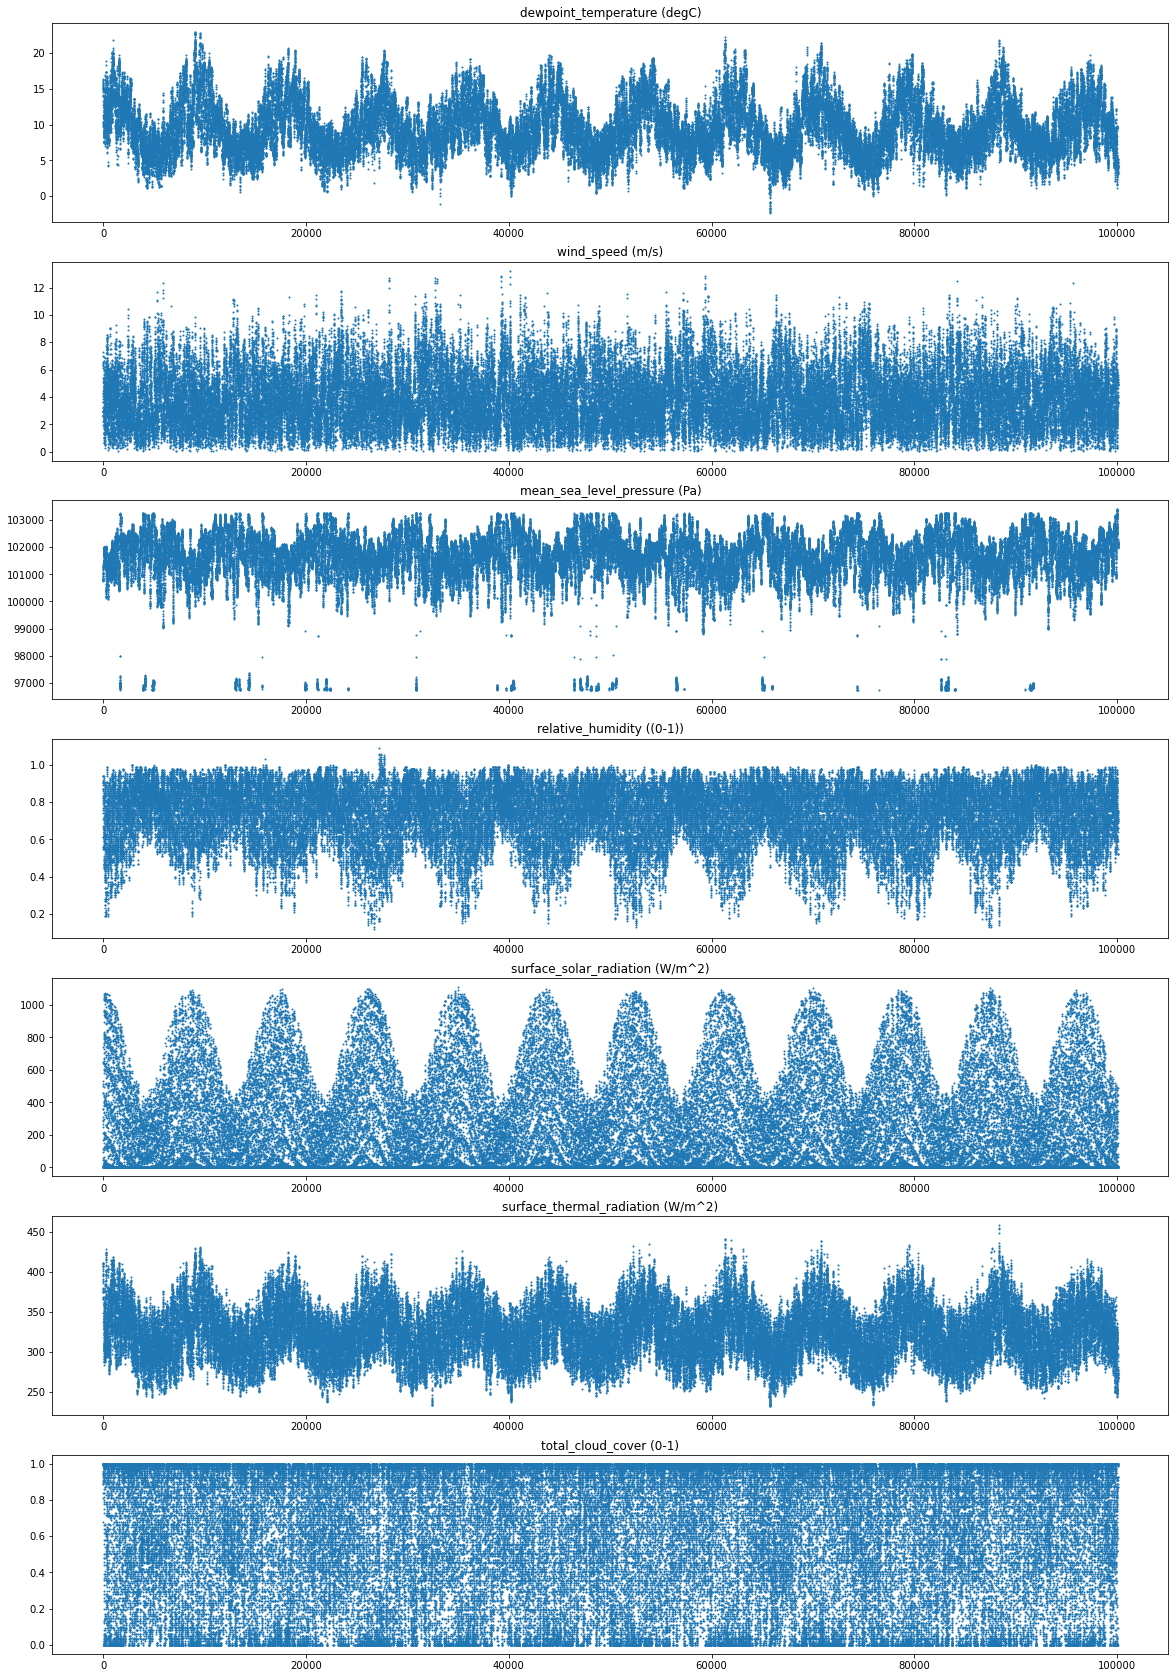

In [31]:
filter_weather_data = weather_data.loc[:, "dewpoint_temperature (degC)":]
length = len(filter_weather_data.columns)

fig, axs = plt.subplots(length, figsize=(20, 30)) 

for i, col in enumerate(filter_weather_data):
  axs[i].set_title(col)
  axs[i].plot(filter_weather_data[col], 'o', markersize=1)

plt.show()